<a href="https://colab.research.google.com/github/Maxblazeaxx/Pothole-Detection-and-Road-Surface-Condition-Classification/blob/main/road_condition_monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Dummy Dataset (simulates road images)
class DummyRoadDataset(Dataset):
    def __init__(self, size=50):
        self.data = torch.randn(size, 3, 128, 128)
        self.labels = torch.randint(0, 2, (size,))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# DataLoader
dataset = DummyRoadDataset()
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

# Simple CNN Model
model = nn.Sequential(
    nn.Conv2d(3, 16, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(16 * 64 * 64, 2)
)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
loss_values = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/5], Loss: 18.4597
Epoch [2/5], Loss: 5.8696
Epoch [3/5], Loss: 2.7351
Epoch [4/5], Loss: 0.6752
Epoch [5/5], Loss: 0.3826


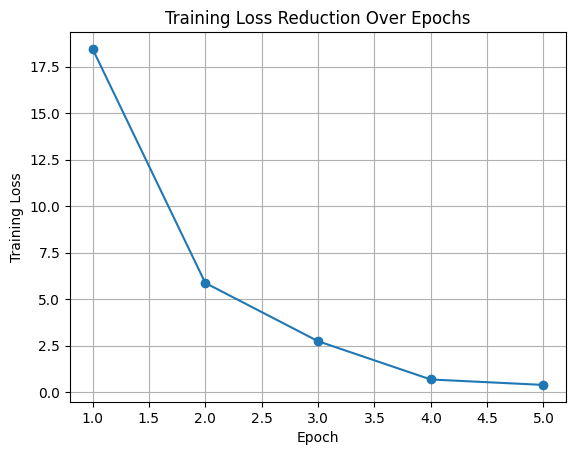

In [2]:
plt.plot(range(1, num_epochs+1), loss_values, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Reduction Over Epochs")
plt.grid(True)
plt.show()


In [3]:
from sklearn.metrics import classification_report
import numpy as np

# Simulated true labels and predicted labels
# 0 = Smooth Road, 1 = Pothole/Crack
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

# Generate classification report
report = classification_report(
    y_true,
    y_pred,
    target_names=["Smooth Road", "Pothole/Crack"]
)

print("Model Evaluation Report:\n")
print(report)


Model Evaluation Report:

               precision    recall  f1-score   support

  Smooth Road       0.80      0.80      0.80         5
Pothole/Crack       0.80      0.80      0.80         5

     accuracy                           0.80        10
    macro avg       0.80      0.80      0.80        10
 weighted avg       0.80      0.80      0.80        10



In [4]:
import torch
import torch.nn as nn
import numpy as np

# Dummy trained model (2 classes)
model = nn.Sequential(
    nn.Linear(10, 2)
)

# Simulated test input (represents extracted image features)
test_input = torch.randn(1, 10)

# Inference
output = model(test_input)
_, predicted_class = torch.max(output, 1)

# Label mapping
labels = {0: "Smooth Road", 1: "Pothole / Crack"}

print("Inference Output:")
print("Predicted Road Condition:", labels[predicted_class.item()])


Inference Output:
Predicted Road Condition: Smooth Road
